In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import seaborn as sns
import imageio
import time
from IPython.display import HTML


#from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs

In [19]:
#data = pd.read_csv('Final_Refined_OneHotEncoded.csv')
data = pd.read_csv('Final_Refined_Encoded_Normalysed.csv')

In [20]:
data.head(20)

,Google,HP,Amazon,Huawei,Toshiba,T-Mobile,vivo,Prestigio,VK Mobile,Wiko,...,RAM,primary_camera,secondary_camera,weight_g,internal_memory,battery,Thickness,display_size,screen_to_body_ratio,Price
0,0,0,0,0,0,0,0,0,0,0,...,0.031235,0.300,0.052632,0.128524,0.062498,0.004180,0.002765,0.344828,0.726636,3
1,0,0,0,0,0,0,0,0,0,0,...,0.046860,0.300,0.210526,0.083077,0.062498,0.005018,0.002150,0.258621,0.748832,4
2,0,0,0,0,0,0,0,0,0,0,...,0.015610,0.175,0.052632,0.076150,0.015623,0.002454,0.005962,0.229885,0.507216,2
3,0,0,0,0,0,0,0,0,0,0,...,0.031235,0.100,0.052632,0.076150,0.124998,0.002706,0.002457,0.522989,0.710280,4
4,0,0,0,0,0,0,0,0,0,0,...,0.046860,0.300,0.631579,0.081579,0.062498,0.004944,0.002150,0.258621,0.717290,4
5,0,0,0,0,0,0,0,0,0,0,...,0.031235,0.300,0.210526,0.076150,0.031248,0.006152,0.003072,0.258621,0.732477,3
6,0,0,0,0,0,0,0,0,0,0,...,0.015610,0.175,0.210526,0.061103,0.015623,0.002454,0.002150,0.229885,0.686916,2
7,0,0,0,0,0,0,0,0,0,0,...,0.031235,0.100,0.052632,0.175369,0.124998,0.005437,0.002304,0.402299,0.695093,4
8,0,0,0,0,0,0,0,0,0,0,...,0.046860,0.500,0.368421,0.073589,0.062498,0.003526,0.002150,0.258621,0.731308,3
9,0,0,0,0,0,0,0,0,0,0,...,0.015610,0.100,0.210526,0.069593,0.015623,0.002454,0.002918,0.201149,0.632009,2


In [21]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2000)

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    model = classifier(**kwargs)
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train accuracy: 98.43%
Test accuracy: 66.09%


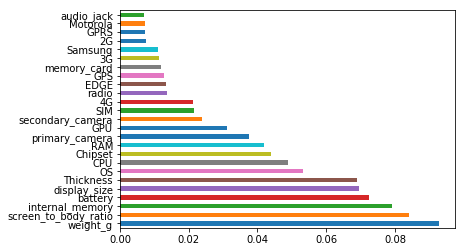

In [58]:
# Random Forests
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, random_state=1000)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)[0:25].plot.barh()